# Identification of an electromechanical system using Entropic Regression

Example created by Wilson Rocha Lacerda Junior

More details about this data can be found in the following paper (in Portuguese): https://www.researchgate.net/publication/320418710_Identificacao_de_um_motorgerador_CC_por_meio_de_modelos_polinomiais_autorregressivos_e_redes_neurais_artificiais

In [ ]:
pip install sysidentpy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sysidentpy.model_structure_selection import ER
from sysidentpy.basis_function._basis_function import Polynomial
from sysidentpy.metrics import root_relative_squared_error
from sysidentpy.utils.generate_data import get_siso_data
from sysidentpy.utils.display_results import results
from sysidentpy.utils.plotting import plot_residues_correlation, plot_results
from sysidentpy.residues.residues_correlation import compute_residues_autocorrelation, compute_cross_correlation

In [2]:
df1 = pd.read_csv('examples/datasets/x_cc.csv')
df2 = pd.read_csv('examples/datasets/y_cc.csv')

<AxesSubplot:>

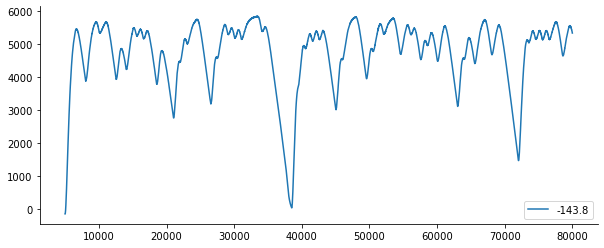

In [3]:
df2[5000:80000].plot(figsize=(10, 4))

In [4]:
# we will decimate the data using d=500 in this example
x_train, x_valid = np.split(df1.iloc[::500].values, 2)
y_train, y_valid = np.split(df2.iloc[::500].values, 2)

## Building a Polynomial NARX model using Entropic Regression Algorithm

In [5]:
basis_function = Polynomial(degree=2)

model = ER(
    ylag=6,
    xlag=6,
    n_perm=2,
    k=2,
    skip_forward=True,
    estimator='recursive_least_squares',
    basis_function=basis_function
)

C:\Users\wilso\AppData\Local\Temp/ipykernel_12756/1917592845.py:1: UserWarning: Given the higher number of possible regressors (91), the Entropic Regression algorithm may take long time to run. Consider reducing the number of regressors 
  model.fit(X=x_train, y=y_train)


0.0403103654397461
        Regressors   Parameters             ERR
0                1  -4.7284E+02  0.00000000E+00
1           y(k-1)   1.2177E+00  0.00000000E+00
2           y(k-2)  -3.8216E-01  0.00000000E+00
3           y(k-4)   2.4306E-01  0.00000000E+00
4           y(k-5)  -2.3846E-01  0.00000000E+00
..             ...          ...             ...
65  x1(k-5)x1(k-2)   3.2336E-01  0.00000000E+00
66  x1(k-6)x1(k-2)   3.4907E-01  0.00000000E+00
67  x1(k-4)x1(k-3)  -1.9440E+00  0.00000000E+00
68  x1(k-5)x1(k-3)   1.9960E-01  0.00000000E+00
69  x1(k-6)x1(k-5)  -1.9914E+00  0.00000000E+00

[70 rows x 3 columns]


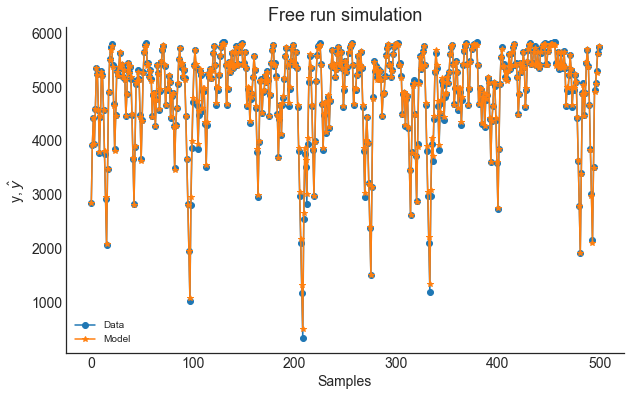

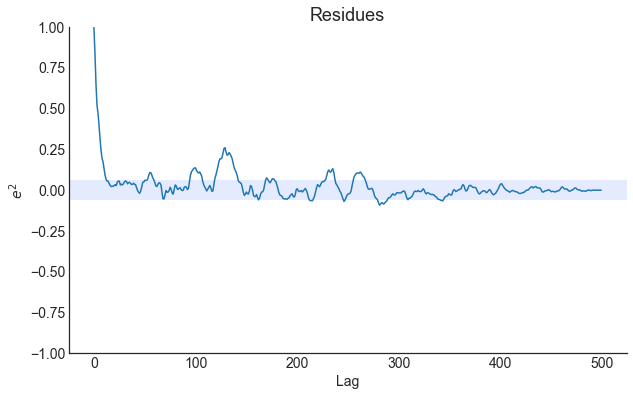

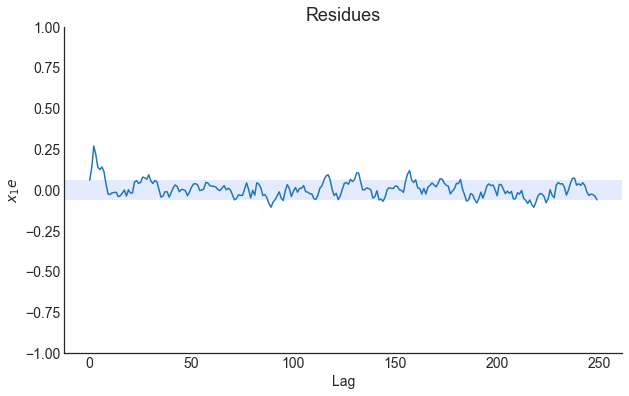

In [6]:
model.fit(X=x_train, y=y_train)
yhat = model.predict(X=x_valid, y=y_valid)
rrse = root_relative_squared_error(y_valid, yhat)
print(rrse)

r = pd.DataFrame(
    results(
        model.final_model, model.theta, model.err,
        model.n_terms, err_precision=8, dtype='sci'
        ),
    columns=['Regressors', 'Parameters', 'ERR'])
print(r)

plot_results(y=y_valid, yhat = yhat, n=1000)
ee = compute_residues_autocorrelation(y_valid, yhat)
plot_residues_correlation(data=ee, title="Residues", ylabel="$e^2$")
x1e = compute_cross_correlation(y_valid, yhat, x_valid)
plot_residues_correlation(data=x1e, title="Residues", ylabel="$x_1e$")